In [ ]:
import urllib.request
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
url_1 = "http://gutenberg.ca/ebooks/hemingwaye-sunalsorises/hemingwaye-sunalsorises-00-t.txt"
file_1 = urllib.request.urlopen(url_1)

url_2 = "http://gutenberg.ca/ebooks/hemingwaye-menwithoutwomen/hemingwaye-menwithoutwomen-00-t.txt"
file_2 = urllib.request.urlopen(url_2)

url_3 = "http://gutenberg.ca/ebooks/hemingwaye-winnertakenothing/hemingwaye-winnertakenothing-00-t.txt"
file_3 = urllib.request.urlopen(url_3)

url_4 = "http://gutenberg.ca/ebooks/hemingwaye-greenhillsofafrica/hemingwaye-greenhillsofafrica-00-t.txt"
file_4 = urllib.request.urlopen(url_4)

url_5 = "http://gutenberg.ca/ebooks/hemingwaye-acrosstheriver/hemingwaye-acrosstheriver-00-t.txt"
file_5 = urllib.request.urlopen(url_5)

url_6 = "http://gutenberg.ca/ebooks/hemingwaye-oldmanandthesea/hemingwaye-oldmanandthesea-00-t.txt"
file_6 = urllib.request.urlopen(url_6)

files = [file_1, file_2, file_3, file_4, file_5, file_6]

In [3]:
ids = []
texts = []
id = 0
for file in files:
    doc_len = 0
    document_text = ""
    for line in file:
        formatted_string = str(line.strip())[1:]
        if len(formatted_string) < 20:
            continue
        document_text = document_text + formatted_string  
        doc_len = doc_len + 1
        if doc_len == 50:
            ids.append(id)
            texts.append(document_text)
            document_text = ""
            doc_len = 0

    id = id + 1

df = pd.DataFrame({'id': ids, 'text':texts})

In [4]:
df

,id,text
0,0,'* A Project Gutenberg Canada Ebook *''This eb...
1,0,'of inferiority and shyness he had felt on bei...
2,0,"'very forceful, and Cohn never had a chance of..."
3,0,"'""You forgot to get your paper,"" I said.''""Tha..."
4,0,"'""None of your exalted connections getting div..."
...,...,...
534,5,"'Now they have beaten me, he thought. I am to..."
535,5,"'others too, he thought. I live in a good tow..."
536,5,"'fight again, he thought. I hope so much I do..."
537,5,'sailed up onto the little patch of shingle be...


In [5]:
year_df = pd.DataFrame({'id':[0,1,2,3,4,5], 'year':[1926,1927,1933,1935,1950,1952]})
year_df

,id,year
0,0,1926
1,1,1927
2,2,1933
3,3,1935
4,4,1950
5,5,1952


In [6]:
import re
# Remove punctuation
df['book_text_processed'] = df['text'].map(lambda x: re.sub('[\',.!?*]', '', str(x)))
# Convert the titles to lowercase
df['book_text_processed'] = df['book_text_processed'].replace(r'\n',' ', regex=True) 
df['book_text_processed'] = df['book_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['book_text_processed'] = df['book_text_processed'].apply(lambda x: x.strip())
df.head()

,id,text,book_text_processed
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project gutenberg canada ebook this ebook is...
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and cohn never had a chance of n...
3,0,"'""You forgot to get your paper,"" I said.''""Tha...","""you forgot to get your paper"" i said""that\s s..."
4,0,"'""None of your exalted connections getting div...","""none of your exalted connections getting divo..."


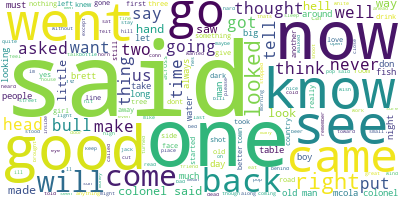

In [7]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['book_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# K means



In [14]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /home/xbiodb/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /home/xbiodb/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/xbiodb/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/xbiodb/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /home/xbiodb/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/xbiodb/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [8]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens] #ending ended -> end
    return words

count_vectorizer = CountVectorizer(tokenizer=textblob_tokenizer)
count_data = count_vectorizer.fit_transform(df['book_text_processed'])
pd.DataFrame(count_data.toarray(), columns=count_vectorizer.get_feature_names())

,1,100678,1030,1081thi,10part,11,1100,118of,12,1253thi,...,zigzag,zinc,zipper,zizi,zonda,zurito,zuritobehind,zuritomanuel,zuritopul,zuritoth
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
df['book_text_processed'] = df['book_text_processed'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words ))
#df['book_text_processed'] = df['book_text_processed'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))


[nltk_data] Downloading package words to /home/xbiodb/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [10]:
df

,id,text,book_text_processed
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project canada this is made available at no ...
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and never had a chance of not be...
3,0,"'""You forgot to get your paper,"" I said.''""Tha...",you forgot to get your paper i said that s so ...
4,0,"'""None of your exalted connections getting div...",none of your exalted getting no listen jake if...
...,...,...,...
534,5,"'Now they have beaten me, he thought. I am to...",now they have beaten me he thought i am too ol...
535,5,"'others too, he thought. I live in a good tow...",too he thought i live in a good could not talk...
536,5,"'fight again, he thought. I hope so much I do...",fight again he thought i hope so much i do not...
537,5,'sailed up onto the little patch of shingle be...,sailed up onto the little patch of shingle bel...


In [11]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

count_vectorizer = CountVectorizer(tokenizer=textblob_tokenizer)
count_data = count_vectorizer.fit_transform(df['book_text_processed'])
pd.DataFrame(count_data.toarray(), columns=count_vectorizer.get_feature_names())

,a,aback,abandon,abdomen,abid,abil,abl,abli,abnorm,aboard,...,young,younger,your,yourself,youth,youv,yuletid,zebra,zigzag,zinc
0,4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1,19,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,12,0,0,0,0,0,0,0,1,0,...,0,0,3,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
535,8,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
536,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Term frequency is given by: 
## Term Frequency Formula 
$tf(w,d) = log(1 + f(w,d))$ 

##Here f(w,d) is the frequency of word w in document d.
## Second step is to calculate the inverse term frequency.
## Inverse Document Frequency Formula
$idf(w, D) = log(\frac{N}{f(w,D)})$

## With N documents in the dataset and f(w, D) the frequency of word w in the whole dataset, this number will be lower with more appearances of the word in the whole dataset.
## Final step is to compute the TF-IDF score by the following formula:

$TF-IDF = tf*idf$

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      norm='l2', 
                      use_idf=False)
matrix = vec.fit_transform(df['book_text_processed'])
lf = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
lf

/home/xbiodb/env/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'st

,aback,abandon,abdomen,abid,abil,abl,abli,abnorm,aboard,abomin,...,york,youd,young,younger,youth,youv,yuletid,zebra,zigzag,zinc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.072548,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.035714,0.0,0.035714,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.087204,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043234,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.043234,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      norm='l2', 
                      use_idf=True)
matrix = vec.fit_transform(df['book_text_processed'])
lf = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
lf

/home/xbiodb/env/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'st

,aback,abandon,abdomen,abid,abil,abl,abli,abnorm,aboard,abomin,...,york,youd,young,younger,youth,youv,yuletid,zebra,zigzag,zinc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.070728,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.054964,0.0,0.044323,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.132275,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.099421,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.071503,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [15]:
from sklearn.cluster import KMeans
cost =[] 
for i in range(1, 14): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(matrix) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)    

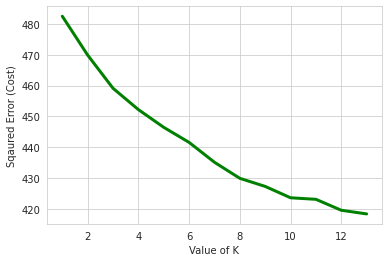

In [18]:
plt.plot(range(1, 14), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

In [19]:
from sklearn.cluster import KMeans

number_of_clusters=6
km = KMeans(n_clusters=number_of_clusters)
# Normally people fit the matrix
km.fit(matrix)
# But you could fit the idf_df instead
km.fit

<bound method KMeans.fit of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [20]:
df['labels'] = km.labels_

In [21]:
zf = (df.groupby(['id','labels']).size()/df.groupby(['id']).size()).reset_index(name ='accuracy')
zf.groupby('id')['accuracy'].max().reset_index(name='accuracy')

,id,accuracy
0,0,0.532787
1,1,0.554054
2,2,0.869565
3,3,0.936937
4,4,0.942149
5,5,1.000000


In [22]:
from sklearn.decomposition import TruncatedSVD
sklearn_svd = TruncatedSVD(n_components = 2)
Y_sklearn = sklearn_svd.fit_transform(matrix)
df['Z_1'] = Y_sklearn[:,0]
df['Z_2'] = Y_sklearn[:,1]

In [23]:
from sklearn.cluster import KMeans

number_of_clusters=6
svd_km = KMeans(n_clusters=number_of_clusters)
svd_km.fit(Y_sklearn)
df['svd_labels'] = svd_km.labels_

In [24]:
zf = (df.groupby(['id','svd_labels']).size()/df.groupby(['id']).size()).reset_index(name ='accuracy')
zf.groupby('id')['accuracy'].max().reset_index(name='accuracy')

,id,accuracy
0,0,0.286885
1,1,0.500000
2,2,0.521739
3,3,0.522523
4,4,0.570248
5,5,0.571429


In [25]:
zf.sort_values('accuracy',inplace=True, ascending=False)
zf

,id,svd_labels,accuracy
23,5,3,0.571429
19,4,0,0.570248
17,3,3,0.522523
12,2,2,0.521739
6,1,2,0.500000
22,5,0,0.404762
20,4,3,0.388430
16,3,0,0.342342
15,2,5,0.304348
1,0,2,0.286885


In [103]:
# use the sum of accuracy values to map the transformed id
from itertools import combinations, permutations
all = list(permutations([0,1,2,3,4,5], 6))
acu = []
for t in all:
    v = 0
    for i in range(6):
        if list(t)[i] not in zf.loc[zf['id'] == i,]['svd_labels'].tolist():
            v = 0
            break
        else:
            v = v+zf.loc[(zf['id'] == i) & (zf['svd_labels'] == list(t)[i]),]['accuracy'].tolist()[0]
    acu.append(v)

In [111]:
map_df = pd.DataFrame({'id':range(6),'transformed_id':list(all[acu.index(max(acu))])})
map_df

,id,transformed_id
0,0,4
1,1,1
2,2,2
3,3,5
4,4,0
5,5,3


In [112]:
plot_df = pd.merge(df,map_df,on='id',how='inner')
plot_df

,id,text,book_text_processed,labels,Z_1,Z_2,svd_labels,transformed_id
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project canada this is made available at no ...,4,0.102498,-0.058192,5,4
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...,1,0.257423,-0.082466,5,4
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and never had a chance of not be...,1,0.414228,0.170199,1,4
3,0,"'""You forgot to get your paper,"" I said.''""Tha...",you forgot to get your paper i said that s so ...,1,0.313512,-0.028219,5,4
4,0,"'""None of your exalted connections getting div...",none of your exalted getting no listen jake if...,5,0.403927,0.230496,1,4
...,...,...,...,...,...,...,...,...
534,5,"'Now they have beaten me, he thought. I am to...",now they have beaten me he thought i am too ol...,4,0.286165,-0.187949,3,3
535,5,"'others too, he thought. I live in a good tow...",too he thought i live in a good could not talk...,4,0.316481,-0.122864,3,3
536,5,"'fight again, he thought. I hope so much I do...",fight again he thought i hope so much i do not...,4,0.272141,-0.139992,3,3
537,5,'sailed up onto the little patch of shingle be...,sailed up onto the little patch of shingle bel...,4,0.300958,-0.129855,3,3


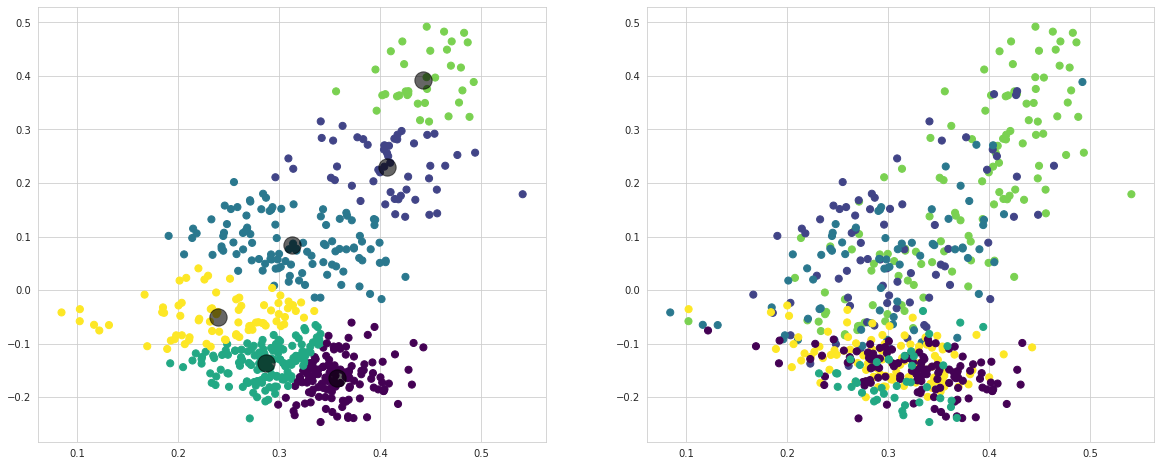

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=plot_df['svd_labels'], s=50, cmap='viridis')

centers = svd_km.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

axes[1].scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=plot_df['transformed_id'], s=50, cmap='viridis')


## use TruncatedSVD to a create a 3D data visualization
#### This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD)

In [134]:
from sklearn.decomposition import TruncatedSVD
sklearn_svd = TruncatedSVD(n_components = 3)
Y_sklearn = sklearn_svd.fit_transform(matrix)
df['S_1'] = Y_sklearn[:,0]
df['S_2'] = Y_sklearn[:,1]
df['S_3'] = Y_sklearn[:,2]

In [135]:
from sklearn.cluster import KMeans

number_of_clusters=6
svd_km = KMeans(n_clusters=number_of_clusters)
svd_km.fit(Y_sklearn)
df['svd_labels_3d'] = svd_km.labels_

In [136]:
zf = (df.groupby(['id','svd_labels_3d']).size()/df.groupby(['id']).size()).reset_index(name ='accuracy')
zf.groupby('id')['accuracy'].max().reset_index(name='accuracy')

,id,accuracy
0,0,0.418033
1,1,0.486486
2,2,0.565217
3,3,0.639640
4,4,0.504132
5,5,0.880952


In [137]:
zf.sort_values('accuracy',inplace=True, ascending=False)
zf

,id,svd_labels_3d,accuracy
19,5,4,0.880952
14,3,4,0.639640
10,2,3,0.565217
16,4,2,0.504132
6,1,3,0.486486
17,4,5,0.438017
1,0,1,0.418033
2,0,3,0.360656
12,3,0,0.333333
8,2,0,0.318841


In [138]:
# use the sum of accuracy values to map the transformed id
from itertools import combinations, permutations
all = list(permutations([0,1,2,3,4,5], 6))
acu = []
for t in all:
    v = 0
    for i in range(6):
        if list(t)[i] not in zf.loc[zf['id'] == i,]['svd_labels_3d'].tolist():
            v = 0
            break
        else:
            v = v+zf.loc[(zf['id'] == i) & (zf['svd_labels_3d'] == list(t)[i]),]['accuracy'].tolist()[0]
    acu.append(v)

In [141]:
map_df = pd.DataFrame({'id':range(6),'transformed_id_3d':list(all[acu.index(max(acu))])})
map_df

,id,transformed_id_3d
0,0,1
1,1,3
2,2,0
3,3,2
4,4,5
5,5,4


In [142]:
plot_df = pd.merge(df,map_df,on='id',how='inner')
plot_df

,id,text,book_text_processed,labels,Z_1,Z_2,svd_labels,Z_3,svd_labels_3d,transformed_id_3d
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project canada this is made available at no ...,4,0.102498,-0.058332,5,-0.017025,0,1
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...,1,0.257423,-0.082450,5,-0.085837,0,1
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and never had a chance of not be...,1,0.414228,0.170214,1,0.059896,3,1
3,0,"'""You forgot to get your paper,"" I said.''""Tha...",you forgot to get your paper i said that s so ...,1,0.313512,-0.028228,5,-0.059263,0,1
4,0,"'""None of your exalted connections getting div...",none of your exalted getting no listen jake if...,5,0.403927,0.230469,1,0.041450,1,1
...,...,...,...,...,...,...,...,...,...,...
534,5,"'Now they have beaten me, he thought. I am to...",now they have beaten me he thought i am too ol...,4,0.286165,-0.187934,3,-0.181662,4,4
535,5,"'others too, he thought. I live in a good tow...",too he thought i live in a good could not talk...,4,0.316481,-0.122859,3,-0.098375,4,4
536,5,"'fight again, he thought. I hope so much I do...",fight again he thought i hope so much i do not...,4,0.272141,-0.139979,3,-0.124176,4,4
537,5,'sailed up onto the little patch of shingle be...,sailed up onto the little patch of shingle bel...,4,0.300958,-0.129876,3,-0.167752,4,4


In [185]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np

# Initialize figure with 2 3D subplots
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]])

# adding subplots.
fig.add_trace(
    go.Scatter3d(x=Y_sklearn[:,0], y=Y_sklearn[:,1], z=Y_sklearn[:,2],mode = 'markers',
                     marker = dict(color=plot_df['svd_labels_3d'], colorscale='Viridis')),row=1, col=1)

fig.add_trace(
    go.Scatter3d(x=Y_sklearn[:,0], y=Y_sklearn[:,1], z=Y_sklearn[:,2],mode = 'markers',
                     marker = dict(color=plot_df['transformed_id_3d'], colorscale='Viridis')),row=1, col=2)

fig.update_layout(showlegend=False)
fig.show()